In [3]:
import numpy as np
from szegedy import SzegedyRandomWalk
import matplotlib.pyplot as plt

In [4]:
def initial_state(unmarked_matrix):
    n = len(unmarked_matrix)
    basis = np.identity(n)
    initial_vector = np.zeros(n * n)
    for i in range(n):
        for j in range(n):
            initial_vector += np.sqrt(unmarked_matrix[i][j]) * np.kron(basis[i], basis[j])
    return initial_vector / np.sqrt(n)

In [5]:
def extract_probability(vector, marked_vertice):
    n = int(np.sqrt(len(vector)))
    return np.power(vector, 2).reshape(n, n).sum(axis=1)[marked_vertice]

In [39]:
def perform_walk(init_state, marked_matrix, marked_vertice, t=1000):
    current_state = init_state
    probabilities = []
    szegedy = SzegedyRandomWalk(marked_matrix)
    f_t = 0
    f_ts = []
            
    for i in range(t):
        f_t += np.power(current_state - init_state, 2).sum()
        f_ts.append(f_t / (i + 1))
        probabilities.append(extract_probability(current_state, marked_vertice))
        current_state = szegedy.operator @ current_state

    plt.plot(list(range(len(probabilities))), probabilities)
    plt.show()
    
    return probabilities, f_ts

## Complete graphs

In [44]:
def create_complete_graph(n, marked_vertice=None):
    if marked_vertice is None:
        marked_vertice = n // 2
    unmarked = np.full((n, n), 1 / (n - 1)) - np.diag(np.full(n, 1 / (n - 1)))
    marked = np.copy(unmarked)
    marked_row = np.zeros(n)
    marked_row[marked_vertice] = 1
    marked[marked_vertice] = marked_row
    return unmarked, marked

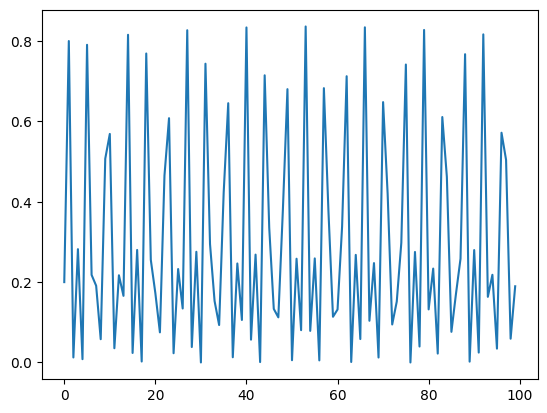

In [52]:
u, m = create_complete_graph(5)
init_st = initial_state(u)
prob, f_ts = perform_walk(init_st, m, 5//2, 100)

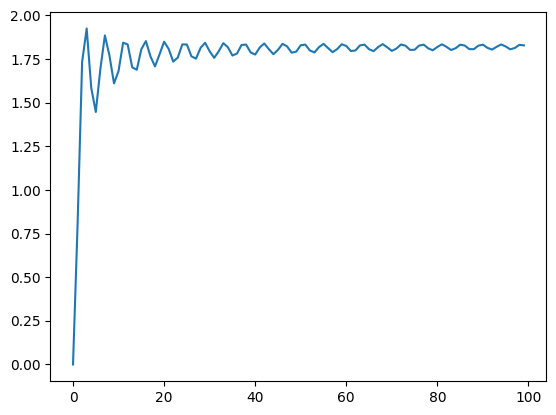

In [53]:
plt.plot(list(range(100)), f_ts)

In [54]:
f_ts

[0.0,
 0.79999999999999995865,
 1.7333333333333332437,
 1.9249999999999999004,
 1.584999999999999918,
 1.4468749999999999251,
 1.6921874999999999123,
 1.8850097656249999024,
 1.7694118923611110195,
 1.6101098632812499166,
 1.681869784268465822,
 1.8436702728271483421,
 1.8331110147329476214,
 1.7023976802825926853,
 1.6885299126307168722,
 1.8061512280255555172,
 1.8527444836847921422,
 1.7653191337361930887,
 1.7077515725879683989,
 1.7768037781270685615,
 1.8493685243554257139,
 1.8078685995602095621,
 1.7350668820050960448,
 1.7584802242168620065,
 1.8337737223673583643,
 1.8329830916765883673,
 1.7655572976560689276,
 1.7521411205566844039,
 1.8136186485235491453,
 1.8429594608736187754,
 1.7944275854635229259,
 1.7568134362854291985,
 1.7947652224519459897,
 1.840846562473376902,
 1.8177126697174137271,
 1.7698945204425708255,
 1.7813272228073959752,
 1.8305545809219962367,
 1.8328502890996232549,
 1.7877304060921365838,
 1.7755156777081963987,
 1.8164242726862748338,
 1.838984001

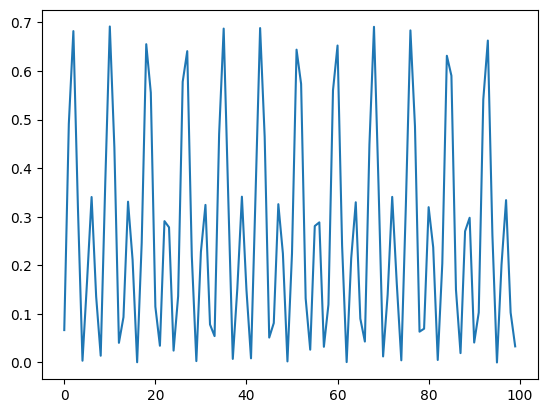

In [60]:
u, m = create_complete_graph(15)
init_st = initial_state(u)
prov, f_ts = perform_walk(init_st, m, 15//2, 100)

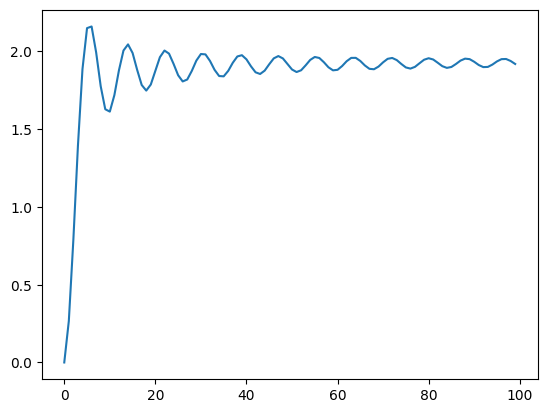

In [61]:
plt.plot(list(range(100)), f_ts)

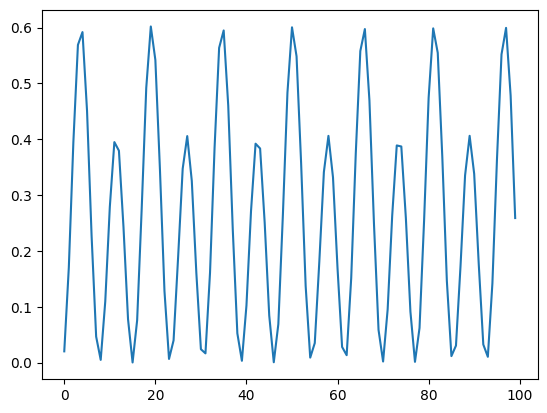

In [64]:
u, m = create_complete_graph(50)
init_st = initial_state(u)
prob, f_ts = perform_walk(init_st, m, 50//2, 100)

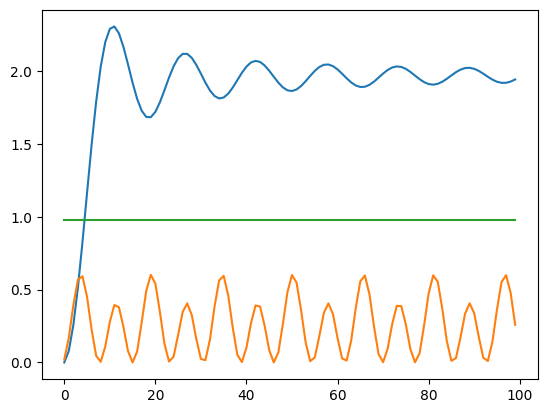

In [68]:
plt.plot(list(range(100)), f_ts)
plt.plot(list(range(len(prob))), prob)
plt.plot(list(range(100)), np.full(100, 1 - 1/50))
plt.show()

In [66]:
f_ts

[0.0,
 0.079999999999999991535,
 0.2580480355407468897,
 0.51579676037386192896,
 0.8277640650696297562,
 1.1642705004481574662,
 1.4947933797053664097,
 1.7913226268575723336,
 2.0313106699470819627,
 2.1998684988603715502,
 2.2909637375642837396,
 2.3075097409433119207,
 2.2603790947834248133,
 2.1665110537515252327,
 2.0463924584799167764,
 1.921261508620145431,
 1.8104051839340209358,
 1.7288926391061487903,
 1.686013932125359639,
 1.6845873043468523725,
 1.721174464173921999,
 1.7871194469615244886,
 1.8702196113471989396,
 1.9567612792549744714,
 2.033616747717260645,
 2.0901072654793038522,
 2.1193852088441268887,
 2.1191696058906153146,
 2.091769593093318384,
 2.043435294581271347,
 1.9831698715717541181,
 1.9212070743695383283,
 1.8673964147462705704,
 1.8297390134847101467,
 1.8132827043272449917,
 1.819521615585001332,
 1.8463636856802789192,
 1.8886421672244737013,
 1.9390672395915846308,
 1.9894528839390493531,
 2.0320204380305163436,
 2.0605776539401068938,
 2.07139976723

## Line

In [47]:
def create_line(n, marked_vertice=None):
    if marked_vertice is None:
        marked_vertice = n - 1
    unmarked = np.zeros((n, n))
    for i in range(n-1):
        unmarked[i][i+1] = 1
    marked = np.copy(unmarked)
    marked[marked_vertice][marked_vertice] = 1
    return unmarked, marked

In [48]:
create_line(5)

(array([[0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0.]]),
 array([[0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 1.]]))

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  

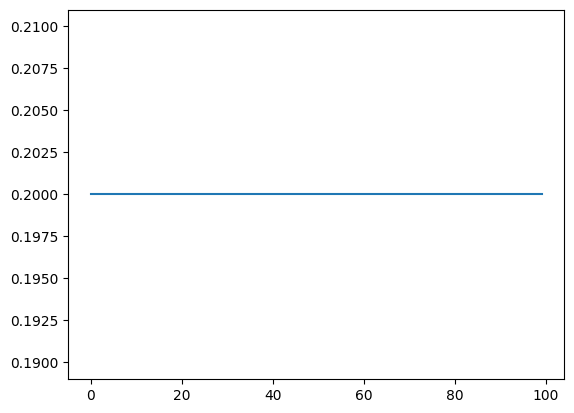

[0.19999999999999998,
 0.19999999999999998965,
 0.19999999999999998965,
 0.19999999999999998965,
 0.19999999999999998965,
 0.19999999999999998965,
 0.19999999999999998965,
 0.19999999999999998965,
 0.19999999999999998965,
 0.19999999999999998965,
 0.19999999999999998965,
 0.19999999999999998965,
 0.19999999999999998965,
 0.19999999999999998965,
 0.19999999999999998965,
 0.19999999999999998965,
 0.19999999999999998965,
 0.19999999999999998965,
 0.19999999999999998965,
 0.19999999999999998965,
 0.19999999999999998965,
 0.19999999999999998965,
 0.19999999999999998965,
 0.19999999999999998965,
 0.19999999999999998965,
 0.19999999999999998965,
 0.19999999999999998965,
 0.19999999999999998965,
 0.19999999999999998965,
 0.19999999999999998965,
 0.19999999999999998965,
 0.19999999999999998965,
 0.19999999999999998965,
 0.19999999999999998965,
 0.19999999999999998965,
 0.19999999999999998965,
 0.19999999999999998965,
 0.19999999999999998965,
 0.19999999999999998965,
 0.19999999999999998965,
 0.

In [12]:
u, m = create_line(5)
init_st = initial_state(u)
perform_walk(init_st, m, 5//2, 100)

In [13]:
init_st

array([0.       , 0.4472136, 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.4472136, 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.4472136, 0.       , 0.       , 0.       , 0.       ,
       0.       , 0.4472136, 0.       , 0.       , 0.       , 0.       ,
       0.       ])

## 

## Symmetric

In [49]:
unmarked_matrix = np.asarray([[0, 0.5, 0, 0, 0.5],
                              [0.5, 0, 0.5, 0, 0],
                              [0, 0.5, 0, 0.5, 0],
                              [0, 0, 0.5, 0, 0.5],
                              [0.5, 0, 0, 0.5, 0]])
marked_matrix = np.asarray([[0, 0.5, 0, 0, 0.5],
                              [0.5, 0, 0.5, 0, 0],
                              [0, 0.5, 0, 0.5, 0],
                              [0, 0, 0, 1, 0],
                              [0.5, 0, 0, 0.5, 0]])

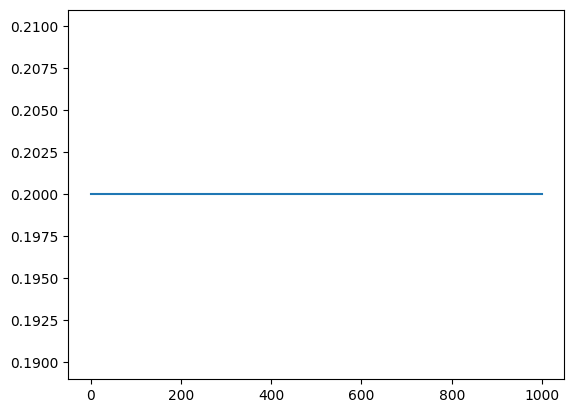

In [50]:
init_st = initial_state(unmarked_matrix)
prob, f_ts = perform_walk(init_st, marked_matrix, 3, 1000)

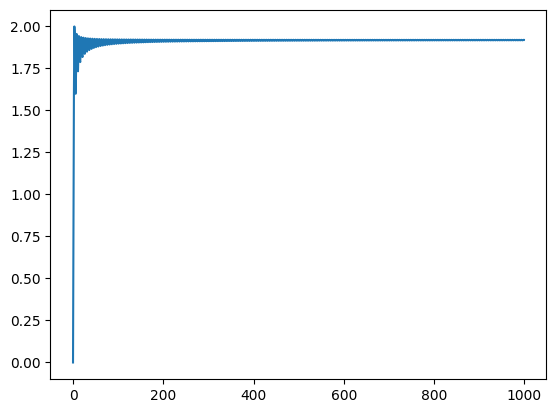

In [51]:
plt.plot(list(range(1000)), f_ts)

## Book example

In [55]:
unmarked_matrix = np.asarray([[0, 0.5, 0.5],
                              [0.5, 0, 0.5],
                              [0.5, 0.5, 0]])
marked_matrix = np.asarray([[0, 0.5, 0.5],
                            [0.5, 0, 0.5],
                            [0, 0, 1]])

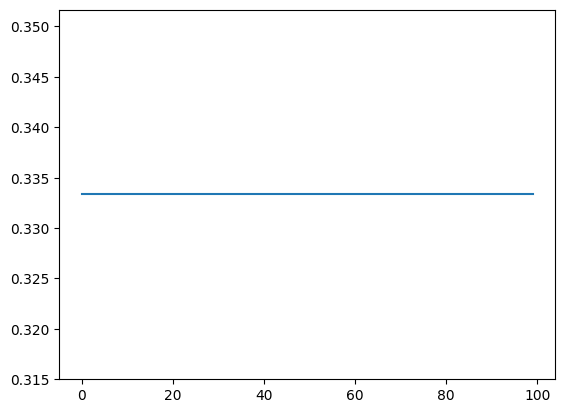

In [57]:
init_st = initial_state(unmarked_matrix)
prob, f_ts = perform_walk(init_st, marked_matrix, 2, 100)

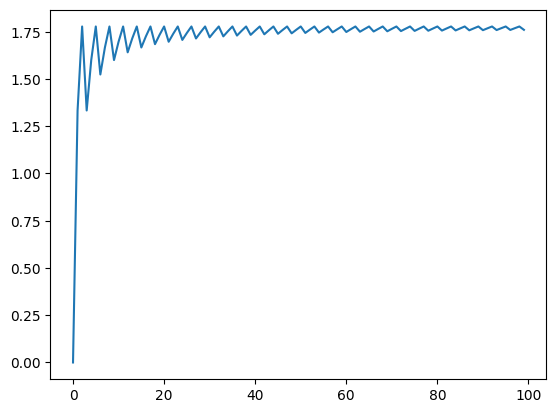

In [59]:
plt.plot(list(range(100)), f_ts)

In [ ]:
plt.plot(list(range(1000)), f_ts)